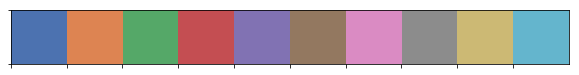

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import seaborn as sns

colors = sns.color_palette('deep')
sns.palplot(colors)
sns.set_style('whitegrid')

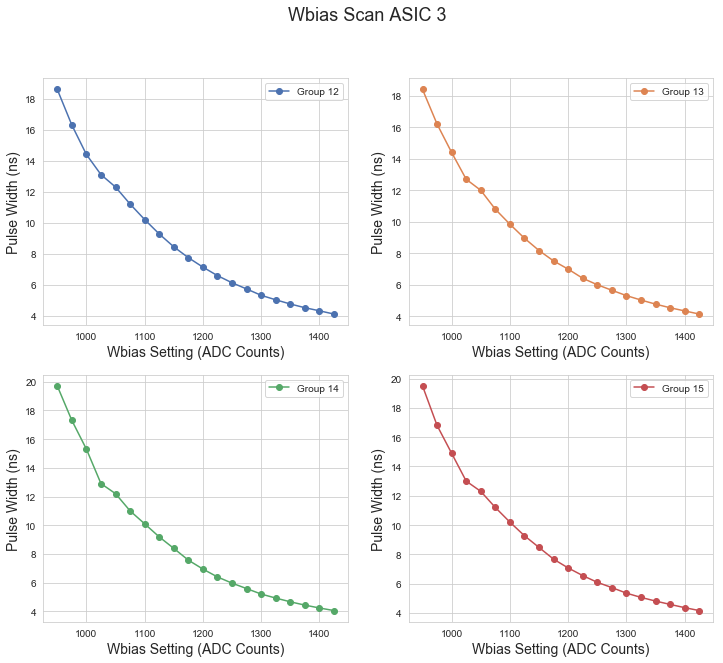

In [47]:
"""Python notebook for plotting Wbias scans for T5TEA testing."""
homedir = os.environ["HOME"] + '/'
#timestamp = str(raw_input("Enter folder name (time stamp): "))
#asic = int(raw_input("ASIC: "))
timestamp = "20190828_1122"
asic = 3

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i in range(4):
    group = asic * 4 + i
    filename = homedir + 'target5and7data/testData2019/module3/T5TEATesting/{}/wbiasScan_{}.dat'.format(timestamp, group)
    wbias_setting, delay, width, delay_sig, width_sig = np.loadtxt(filename, skiprows=1, usecols=(2,3,4,5,6), unpack=True)
    ax[i/2, i%2].plot(wbias_setting, width * 1.0e9, marker='o', color = colors[i], label='Group {}'.format(group))
    ax[i/2, i%2].set_xlabel('Wbias Setting (DAC Counts)', fontsize=14)
    ax[i/2, i%2].set_ylabel('Pulse Width (ns)', fontsize=14)
    ax[i/2, i%2].legend(loc='upper right')

fig.suptitle('Wbias Scan ASIC {}'.format(asic), fontsize=18)
fig.savefig('{}/Desktop/Grad School/Research/wbias_Scan_asic{}.pdf'.format(homedir, asic))

#ALEX
#ax[i/2, i%2].plot(wbias_setting, width * 1.0e9, marker='o', color = colors[i])
    

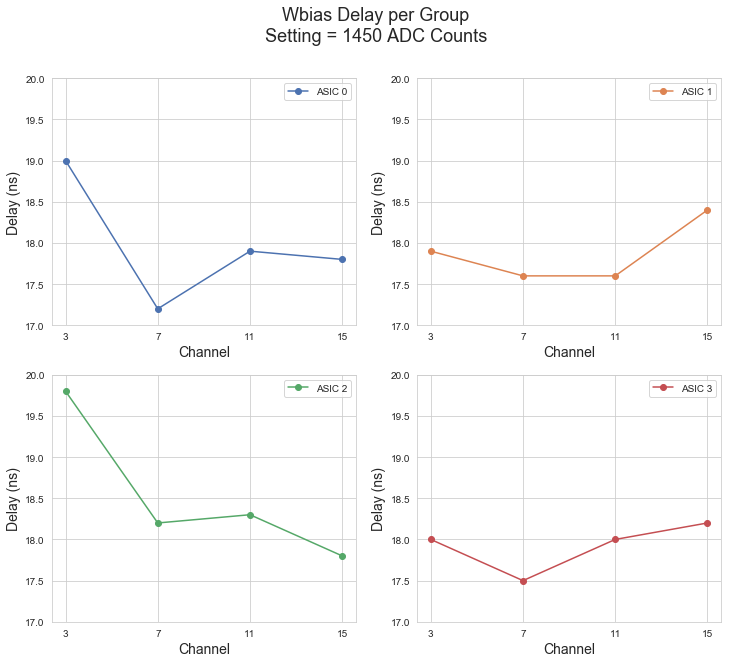

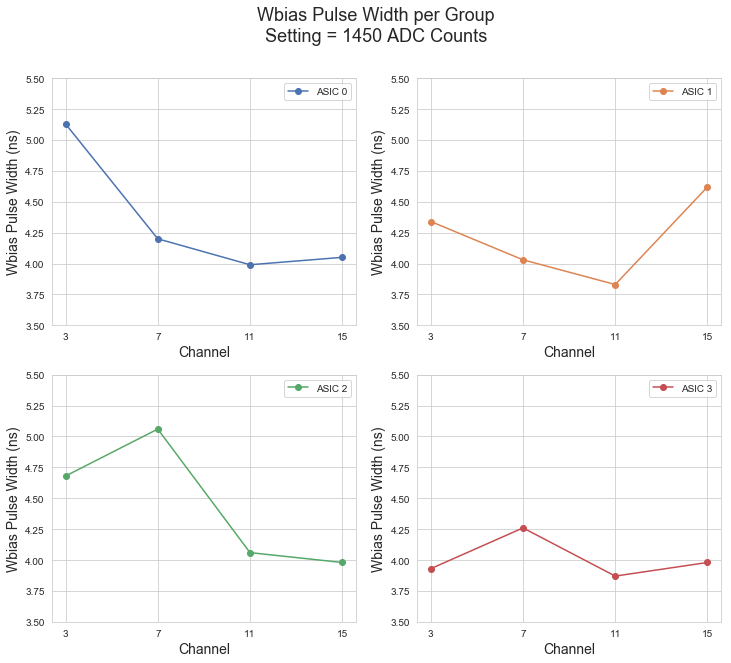

In [48]:
timestamps = ['20190828_1350', '20190828_1321', '20190828_1421', '20190828_1259']

del_fig, del_ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
wid_fig, wid_ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for asic in range(4):
    delay_data = []
    width_data = []
    channel = [3, 7, 11, 15]
    label = []
    for i in range(4):
        group = asic * 4 + i
        filename = '{}/target5and7data/testData2019/module3/T5TEATesting/{}/wbiasScan_{}.dat'.format(homedir, timestamps[asic], group)
        data = np.loadtxt(filename, skiprows=1)
        delay_data.append(data[3])
        width_data.append(data[4])
    delay_data = np.asarray(delay_data)
    width_data = np.asarray(width_data)
    del_ax[asic/2, asic%2].plot(channel, delay_data * 1.0e9 * -1., marker='o', label='ASIC {}'.format(asic), color=colors[asic])
    wid_ax[asic/2, asic%2].plot(channel, width_data * 1.0e9, marker='o', label='ASIC {}'.format(asic), color=colors[asic])
    
    del_ax[asic/2, asic%2].set_xticks(channel)
    del_ax[asic/2, asic%2].set_xlabel('Channel', fontsize=14)
    del_ax[asic/2, asic%2].set_ylabel('Delay (ns)', fontsize=14) #Delay between pulse and wbias response in trigger group.
    del_ax[asic/2, asic%2].legend()
    del_ax[asic/2, asic%2].set_ylim(17.0, 20.0)
    
    wid_ax[asic/2, asic%2].set_xticks(channel)
    wid_ax[asic/2, asic%2].set_xlabel('Channel', fontsize=14)
    wid_ax[asic/2, asic%2].set_ylabel('Wbias Pulse Width (ns)', fontsize=14)
    wid_ax[asic/2, asic%2].legend()
    wid_ax[asic/2, asic%2].set_ylim(3.5, 5.5)
    
del_fig.suptitle('Wbias Delay per Group\nSetting = 1450 DAC Counts', fontsize=18)
#del_fig.subtitle('Wbias Setting = 1450 ADC Counts', fontsize=16)
wid_fig.suptitle('Wbias Pulse Width per Group\nSetting = 1450 DAC Counts', fontsize=18)
#wid_fig.subtitle('Wbias Setting = 1450 ADC Counts', fontsize=16)

del_fig.savefig('{}/Desktop/Grad School/Research/Wbias_delays_1450.pdf'.format(homedir))
wid_fig.savefig('{}/Desktop/Grad School/Research/Wbias_widths_1450.pdf'.format(homedir))